<a href="https://colab.research.google.com/github/jayU000/bugbugcoding/blob/master/pythonbasic11_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#################################################################
# 1. 문제  파악  - 배경 이해, 분석 목표, 분석 일정, 데이터 확보 # 
#################################################################

# G drive connection
from google.colab import drive
drive.mount('/gdrive/')



Mounted at /gdrive/


In [4]:
# modules setting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/gdrive/My Drive/Colab Notebooks/titanic/train.csv')
test = pd.read_csv('/gdrive/My Drive/Colab Notebooks/titanic/test.csv')
submission = pd.read_csv('/gdrive/My Drive/Colab Notebooks/titanic/submission.csv')

print(train.shape)
print(test.shape)
print(submission.shape)


(891, 12)
(418, 11)
(418, 2)


In [7]:
# 요약 통계 정보
train.describe()

# 기본적으로는 숫자 데이터 열만 요약



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.describe(include='all')
# 문자를 포함한 모든 열의 통계 정보

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


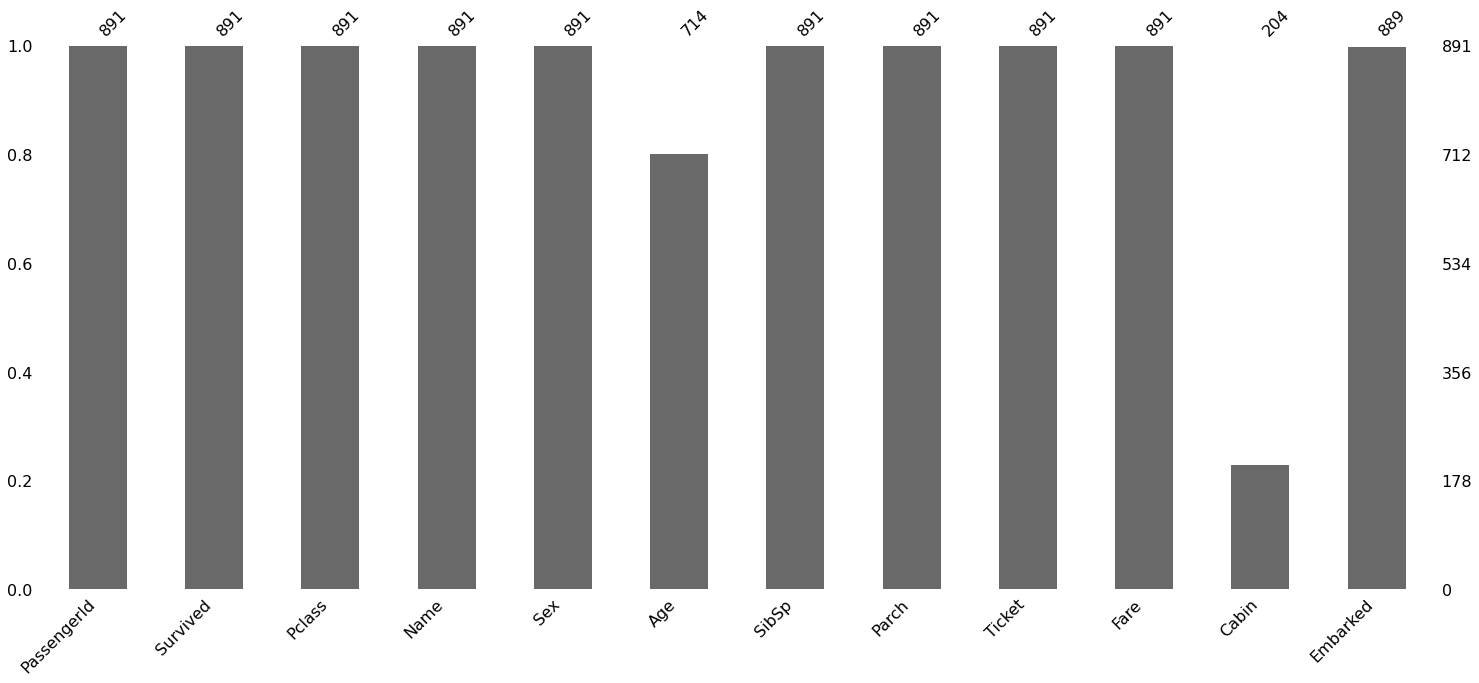

In [9]:
#################################################################
# 2. 데이터   탐색 - 결측치/이상치 파악, 데이터 분포, 상관 관계 # 
#################################################################

# 결측치 확인

import missingno as msno

msno.bar(train)   # 결측치 개수 확인


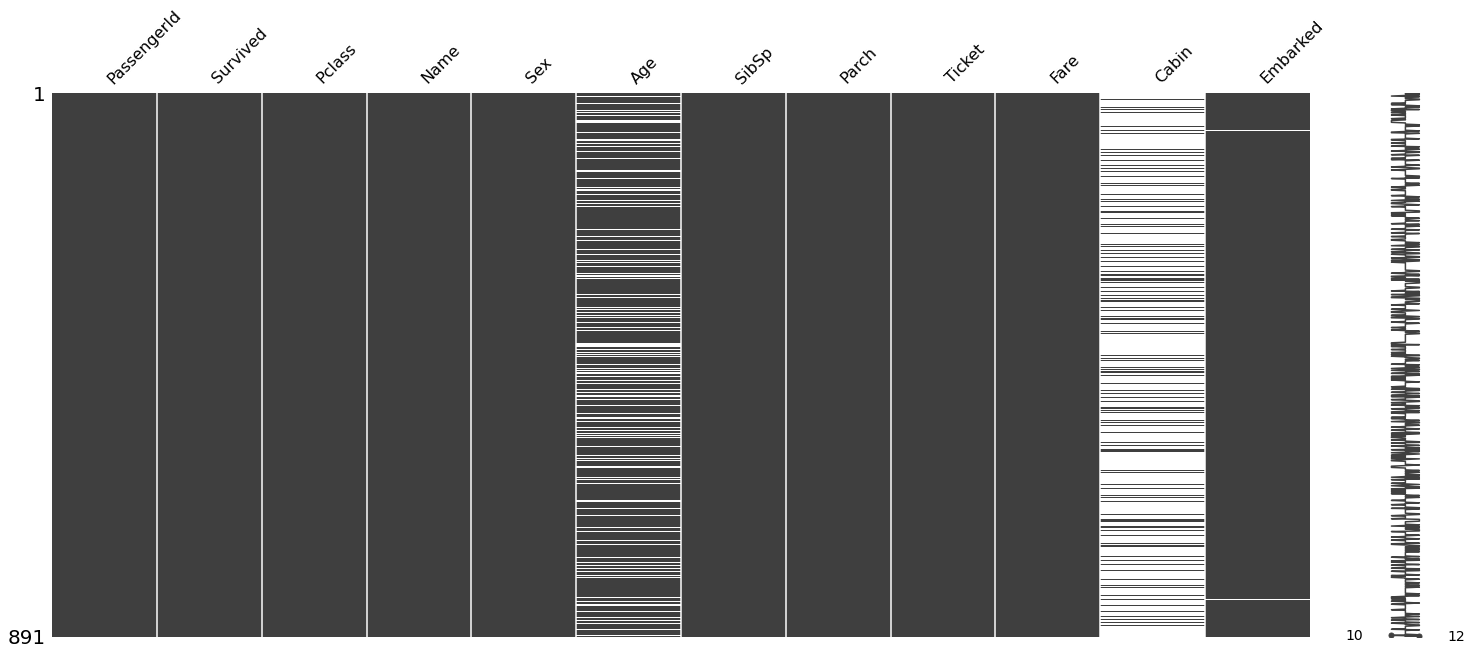

In [10]:
msno.matrix(train)    # 결측치 분포 확인

In [11]:
# 상관관계 분석
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


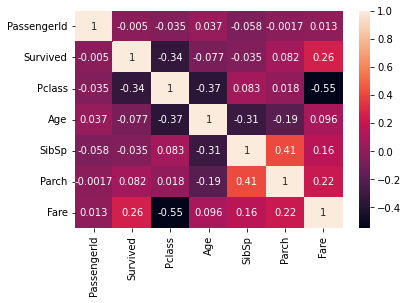

In [14]:
# sns.pairplot(train, hue='Survived')
sns.heatmap(data=train.corr(), annot=True)

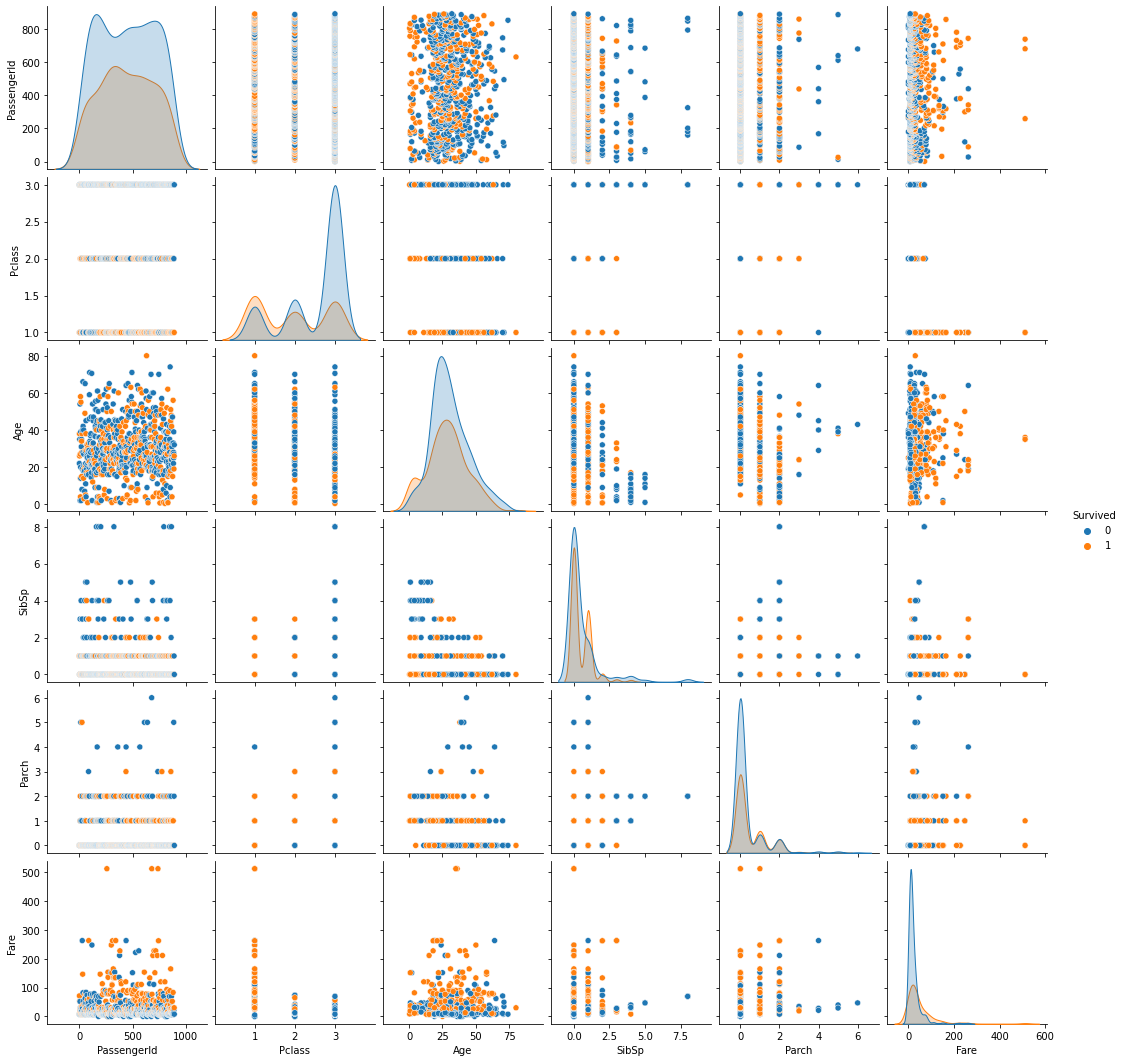

In [16]:
sns.pairplot(train, hue='Survived')


In [17]:
########################################################################
# 3. 데이터 전처리 - 결측치/이상치 처리, 자료형 변환, 속성을 추가 생성 #
########################################################################

# 추후 분석을 끝내고 학습을 시킬 때 다시 분리하기 편하도록 split 열을 만들어 각각 이름을 부여한다.
train['split'] = 'Train'
test['split'] = 'Test'

# 데이터 결합
data = pd.concat([train, test], axis = 0)

data.shape

(1309, 13)

In [23]:
data_num = data.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
data_num

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.0,1,0,7.2500,0.0
1,1,38.0,1,0,71.2833,1.0
2,3,26.0,0,0,7.9250,1.0
3,1,35.0,1,0,53.1000,1.0
4,3,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,NaN
414,1,39.0,0,0,108.9000,NaN
415,3,38.5,0,0,7.2500,NaN
416,3,NaN,0,0,8.0500,NaN


In [24]:
# 결측치 처리 - 0, del, mean, most freq 

# age   - 평균
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())

# fare  - 최빈, 삭제
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])      # mode()  빈도수가 높은 순서대로 값을 추출해줌

data_num


,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.000000,1,0,7.2500,0.0
1,1,38.000000,1,0,71.2833,1.0
2,3,26.000000,0,0,7.9250,1.0
3,1,35.000000,1,0,53.1000,1.0
4,3,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...
413,3,29.881138,0,0,8.0500,NaN
414,1,39.000000,0,0,108.9000,NaN
415,3,38.500000,0,0,7.2500,NaN
416,3,29.881138,0,0,8.0500,NaN


In [26]:
from sklearn.model_selection import train_test_split

# 문제지와 답안지로 분리

selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

X_train = data_num.loc[data['split'] == 'Train', selected_features]   # 훈련용 문제지
y_train = data_num.loc[data['split']== 'Train', 'Survived']           # 훈련용 답안지

X_test = data_num.loc[data['split'] == 'Test', selected_features]   # 제출용 문제지
# y_test = submission['Survived']                                     # 제출용 답안지


# 훈련용 80% - 검증용 20% 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, 
                                                     test_size=0.2,     # 생략하면 기본 값으로 0.25:0.75로 설정됨. 
                                                     shuffle=True, 
                                                     random_state=20)

print(X_tr)
print(X_val)
print(y_tr)
print(y_val)




     Pclass        Age  SibSp  Parch     Fare
811       3  39.000000      0      0  24.1500
29        3  29.881138      0      0   7.8958
49        3  18.000000      1      0  17.8000
105       3  28.000000      0      0   7.8958
616       3  34.000000      1      1  14.4000
..      ...        ...    ...    ...      ...
218       1  32.000000      0      0  76.2917
223       3  29.881138      0      0   7.8958
271       3  25.000000      0      0   0.0000
474       3  22.000000      0      0   9.8375
355       3  28.000000      0      0   9.5000

[712 rows x 5 columns]
     Pclass        Age  SibSp  Parch     Fare
347       3  29.881138      1      0  16.1000
674       2  29.881138      0      0   0.0000
791       2  16.000000      0      0  26.0000
836       3  21.000000      0      0   8.6625
56        2  21.000000      0      0  10.5000
..      ...        ...    ...    ...      ...
694       1  60.000000      0      0  26.5500
428       3  29.881138      0      0   7.7500
431       

In [53]:
# voting
from sklearn.ensemble import VotingClassifier as Vot 
from sklearn.tree import DecisionTreeClassifier as DT 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier as KN   

knn = KN(n_neighbors=25) 
knn.fit(X_tr, y_tr) 

svc = SVC(kernel='rbf')
svc.fit(X_tr, y_tr)

dtc = DT(max_depth = 15, random_state = 10)
dtc.fit(X_tr, y_tr)

evc = Vot(estimators=[('KNN',knn),('SVM',svc),('DT',dtc)],   
          voting='hard')   
evc.fit(X_tr, y_tr) 

# 예측 (시험)
evc_pred = evc.predict(X_val)           
evc_pred 

# 평가
from sklearn.metrics import accuracy_score  
accuracy_score(y_val, evc_pred)

# n_neighbors=10       0.6606703910614525
# n_neighbors=20       0.7206703910614525
# n_neighbors=25       0.7374301675977654


0.7374301675977654

In [ ]:
# by 장서영

from sklearn.tree import DecisionTreeClassifier                 # DT 모듈 읽어오기
dtc = DecisionTreeClassifier(max_depth=3, random_state = 10)    # dtc 객체 생성하기 
dtc.fit(X_tr, y_tr)                                       # 훈련용 데이터셋과 훈련용 결과로 학습하여 모델 생성 

# 예측 (결과)

dtc_pred = dtc.predict(X_val)   # 검증용 데이터셋만 제시, y_test 결과는 미제공 
dtc_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score            # 평가 모듈 읽어오기 
accuracy_score(y_val, dtc_pred)

# 0.7206703910614525


In [ ]:
# 피처 엔지니어링

# 피처값들을 가공하여 모델의 성능을 개선할수 있는 여러 방법들을 고민해보자. 

train['Survived'].value_counts()   # 0 사망자  1 생존자

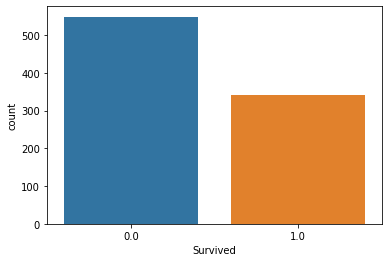

In [43]:
sns.countplot(x='Survived', data =data[data['split'] == 'Train'])

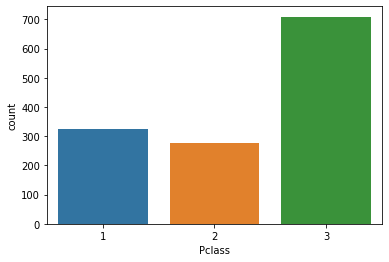

In [44]:
# Pclass : 객실 등급

sns.countplot(x='Pclass', data=data)



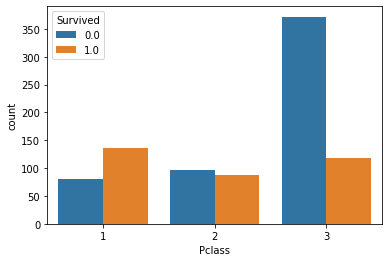

In [45]:
sns.countplot(x='Pclass', hue='Survived', data=data)


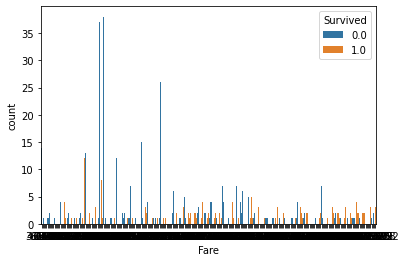

In [46]:
sns.countplot(x='Fare', hue='Survived', data=data)


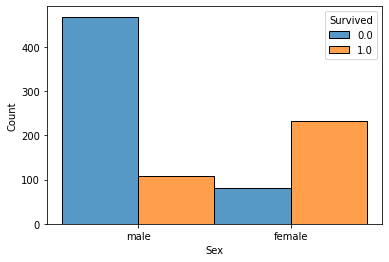

In [50]:
# Feature Engineering

# 성별

sns.histplot(x = 'Sex', hue = 'Survived', multiple = 'dodge', data =data[data['split'] == 'Train'])


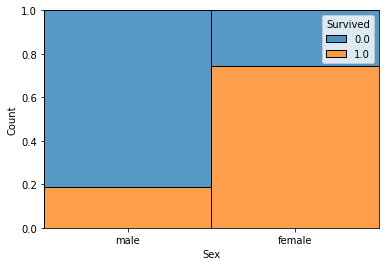

In [51]:
sns.histplot(x = 'Sex', hue = 'Survived', multiple = 'fill', data =data[data['split'] == 'Train'])


In [52]:
data['Sex']

# 성별의 차이는 생존에 있어 상당히 큰 요인으로 작용하고 있는 것을 볼 수 있다.
# 하지만 현재 성별 값은 문자로 male 과 female로 되어있어 머신러닝 알고리즘에 넣을 수 없다.
# 따라서 문자형 데이터 타입을 숫자화하는 작업이 필요하고 다양한 방법이 존재한다.

# 

0        male
1      female
2      female
3      female
4        male
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 1309, dtype: object

In [54]:
# female = 0
# male = 1

data.loc[data['Sex'] == 'female', 'Sex'] = 0
data.loc[data['Sex'] == 'male', 'Sex'] = 1


data['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 1309, dtype: object

In [55]:
# 형변환
data['Sex'] = data['Sex'].astype(int)
data['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 1309, dtype: int64

In [56]:
# name
data['Name']


0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [70]:
data['Name'].unique()

title_name = data['Name'].str.split(',', expand = True)[1]     # 시리즈 데이터형을 str로 변환하여 자르고 인덱싱

title = title_name.str.split('.', expand = True)[0]     # 시리즈 데이터형을 str로 변환하여 자르고 인덱싱

title

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
        ...   
413         Mr
414       Dona
415         Mr
416         Mr
417     Master
Name: 0, Length: 1309, dtype: object

In [71]:
title.value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: 0, dtype: int64

In [78]:
# 비슷한 속성을 가진 타이틀들을 그룹으로 묶어보자

title = title.replace(['Mrs', 'Miss'], 'Ms')
title = title.replace(['Mlle', 'the Countess', 'Lady', 'Don', 'Dona', 'Mme', 'Sir', 'Jonkheer'], 'Novel')
title = title.replace(['Col', 'Major', 'Cap'], 'Officer')
title = title.replace(['Dr', 'Rev'], 'Priest')

data['title'] = np.array(title)
data['title']
data['title'].value_counts()

AttributeError: ignored

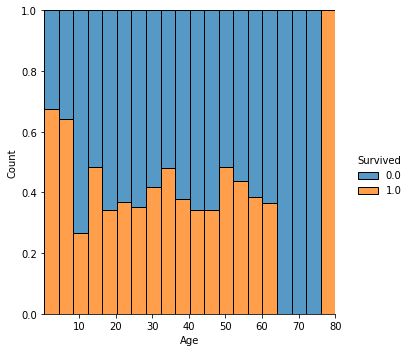

In [81]:
# Age

sns.displot(x = 'Age', kind = 'hist', multiple = 'fill', hue = 'Survived', data=data[data['split'] == 'Train'])

In [92]:
bins = [0,4,8,12,16, 20, 32, 48, 54, 70, 100 ]
labels = ['infant', 'child1', 'child2', 'youth1', 'youth2', 'adult1', 'adult2', 'middle age', 'senior', 'elderly']

# bins = [0, 4, 8, 12, 16, 32, 36, 48, 56, 64, 100]
# labels = ['Infant','Child1','Chind2','Youth1','Youth2','Adult1','Adult2','Middle Aged','Senior','Elderly']

data['AgeBin'] = pd.cut(data['Age'], bins=bins, labels=labels)


# data['AgeBin'] = pd.cut(data['Age'], bins = bins, labels = labels)
data['AgeBin']

0      adult1
1      adult2
2      adult1
3      adult2
4      adult2
        ...  
413       NaN
414    adult2
415    adult2
416       NaN
417       NaN
Name: AgeBin, Length: 1309, dtype: category
Categories (10, object): ['infant' < 'child1' < 'child2' < 'youth1' ... 'adult2' < 'middle age' <
                          'senior' < 'elderly']

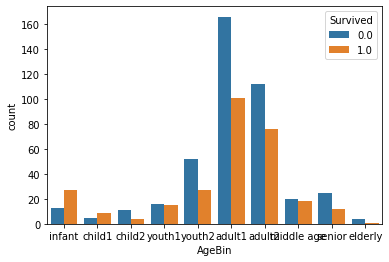

In [93]:
# 나이 구간별 생존 율 비교

sns.countplot(x = 'AgeBin', hue = 'Survived', data=data[data['split'] == 'Train'])


In [142]:
# 새로운 피처 값을 추가하여 정확도 확인

data_num = data.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived','Sex']]

# 결측치 처리 - 0, del, mean, most freq 

# age   - 평균
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())

# fare  - 최빈, 삭제
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])      # mode()  빈도수가 높은 순서대로 값을 추출해줌

data_num


selected_features = ['Pclass','Age','SibSp','Parch','Fare','Sex']

X_train = data_num.loc[data['split']=='Train', selected_features]  #훈련용 문제지
y_train = data_num.loc[data['split']=='Train','Survived']          #훈련용 답안지

X_test = data_num.loc[data['split']=='Test', selected_features]    #검증용 문제지

In [143]:
# 훈련용 80% - 검증용 20% 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, 
                                                     test_size=0.2,     # 생략하면 기본 값으로 0.25:0.75로 설정됨. 
                                                     shuffle=True, 
                                                     random_state=20)

print(X_tr)
print(X_val)
print(y_tr)
print(y_val)

     Pclass        Age  SibSp  Parch     Fare  Sex
811       3  39.000000      0      0  24.1500    1
29        3  29.881138      0      0   7.8958    1
49        3  18.000000      1      0  17.8000    0
105       3  28.000000      0      0   7.8958    1
616       3  34.000000      1      1  14.4000    1
..      ...        ...    ...    ...      ...  ...
218       1  32.000000      0      0  76.2917    0
223       3  29.881138      0      0   7.8958    1
271       3  25.000000      0      0   0.0000    1
474       3  22.000000      0      0   9.8375    0
355       3  28.000000      0      0   9.5000    1

[712 rows x 6 columns]
     Pclass        Age  SibSp  Parch     Fare  Sex
347       3  29.881138      1      0  16.1000    0
674       2  29.881138      0      0   0.0000    1
791       2  16.000000      0      0  26.0000    1
836       3  21.000000      0      0   8.6625    1
56        2  21.000000      0      0  10.5000    0
..      ...        ...    ...    ...      ...  ...
694    

In [128]:
# voting
from sklearn.ensemble import VotingClassifier as Vot 
from sklearn.tree import DecisionTreeClassifier as DT 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier as KN   

knn = KN(n_neighbors=10) 
knn.fit(X_tr, y_tr) 

svc = SVC(kernel='rbf')
svc.fit(X_tr, y_tr)

dtc = DT(max_depth = 4, random_state = 10)
dtc.fit(X_tr, y_tr)

evc = Vot(estimators=[('KNN',knn),('SVM',svc),('DT',dtc)],   
          voting='hard')   
evc.fit(X_tr, y_tr) 

# 예측 (시험)
evc_pred = evc.predict(X_val)           
evc_pred 

# 평가
from sklearn.metrics import accuracy_score  
accuracy_score(y_val, evc_pred)

# n_neighbors=10       0.6606703910614525
# n_neighbors=20       0.7206703910614525
# n_neighbors=23       0.7486033519553073
# n_neighbors=25       0.7374301675977654

0.7206703910614525

In [147]:
# by 장서영

from sklearn.tree import DecisionTreeClassifier                 # DT 모듈 읽어오기
dtc = DecisionTreeClassifier(max_depth=6, random_state = 10)    # dtc 객체 생성하기 
dtc.fit(X_tr, y_tr)                                       # 훈련용 데이터셋과 훈련용 결과로 학습하여 모델 생성 

# 예측 (결과)

dtc_pred = dtc.predict(X_val)   # 검증용 데이터셋만 제시, y_test 결과는 미제공 
dtc_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score            # 평가 모듈 읽어오기 
accuracy_score(y_val, dtc_pred)

# 0.8268156424581006

0.8268156424581006

In [146]:
# 앙상블 모델 학습 (지도학습 : 문제와 정답을 함께 제시)
from sklearn.ensemble import RandomForestClassifier  # RFC 모듈 읽어오기
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=10) 
        # rfc 객체 생성하기, n_estimators=나무의 개수, 
rfc.fit(X_tr, y_tr)    # 훈련용 문제와 훈련용 답안지로 학습하여 모델 생성

# 예측 (시험)

rfc_pred = rfc.predict(X_val)   # 검증용 문제지만 제시  y_test 답안지는 미제공
rfc_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score # 평가 모듈 읽어오기
accuracy_score(y_val, rfc_pred)           # 예측 결과와 실제 결과 데이터 비교후 정확도 평가


0.8435754189944135

In [145]:
# 앙상블 모델 학습 (지도학습 : 문제와 정답을 함께 제시)
from xgboost import XGBClassifier as XGBC # XGBC 모듈 읽어오기
xgbc = XGBC(n_estimators=80, max_depth=5, random_state=10) 
        # xgbc 객체 생성하기, n_estimators=나무의 개수, max_depth=각 나무의 깊이
xgbc.fit(X_tr, y_tr)    # 훈련용 문제와 훈련용 답안지로 학습하여 모델 생성

# 예측 (시험)

xgbc_pred = xgbc.predict(X_val)   # 검증용 문제지만 제시  y_test 답안지는 미제공
xgbc_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score # 평가 모듈 읽어오기
accuracy_score(y_val, xgbc_pred)           # 예측 결과와 실제 결과 데이터 비교후 정확도 평가


0.8435754189944135

In [177]:
# AgeBin

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data_num = data.loc[:,['Pclass','Age','SibSp','Parch','Fare','Sex','AgeBin','Survived']]

data_num['AgeBin'] = encoder.fit_transform(data['AgeBin'])
data_num['AgeBin']

# age   - 평균
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())

# fare  - 최빈, 삭제
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])      # mode()  빈도수가 높은 순서대로 값을 추출해줌

data_num


X_train = data_num.loc[data['split']=='Train', selected_features]  #훈련용 문제지
y_train = data_num.loc[data['split']=='Train','Survived']          #훈련용 답안지

X_test = data_num.loc[data['split']=='Test', selected_features]    #검증용 문제지

# 훈련용 80% - 검증용 20% 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, 
                                                     test_size=0.2,     # 생략하면 기본 값으로 0.25:0.75로 설정됨. 
                                                     shuffle=True, 
                                                     random_state=20)

print(X_tr)
print(X_val)
print(y_tr)
print(y_val)

     Pclass        Age  SibSp  Parch     Fare  Sex
811       3  39.000000      0      0  24.1500    1
29        3  29.881138      0      0   7.8958    1
49        3  18.000000      1      0  17.8000    0
105       3  28.000000      0      0   7.8958    1
616       3  34.000000      1      1  14.4000    1
..      ...        ...    ...    ...      ...  ...
218       1  32.000000      0      0  76.2917    0
223       3  29.881138      0      0   7.8958    1
271       3  25.000000      0      0   0.0000    1
474       3  22.000000      0      0   9.8375    0
355       3  28.000000      0      0   9.5000    1

[712 rows x 6 columns]
     Pclass        Age  SibSp  Parch     Fare  Sex
347       3  29.881138      1      0  16.1000    0
674       2  29.881138      0      0   0.0000    1
791       2  16.000000      0      0  26.0000    1
836       3  21.000000      0      0   8.6625    1
56        2  21.000000      0      0  10.5000    0
..      ...        ...    ...    ...      ...  ...
694    

In [149]:
data_num


,Pclass,Age,SibSp,Parch,Fare,Sex,AgeBin,Survived
0,3,22.000000,1,0,7.2500,1,0,0.0
1,1,38.000000,1,0,71.2833,0,1,1.0
2,3,26.000000,0,0,7.9250,0,0,1.0
3,1,35.000000,1,0,53.1000,0,1,1.0
4,3,35.000000,0,0,8.0500,1,1,0.0
...,...,...,...,...,...,...,...,...
413,3,29.881138,0,0,8.0500,1,10,NaN
414,1,39.000000,0,0,108.9000,0,1,NaN
415,3,38.500000,0,0,7.2500,1,1,NaN
416,3,29.881138,0,0,8.0500,1,10,NaN


In [178]:
# 앙상블 모델 학습 (지도학습 : 문제와 정답을 함께 제시)
from xgboost import XGBClassifier as XGBC # XGBC 모듈 읽어오기
xgbc = XGBC(n_estimators=100, max_depth=5, random_state=10) 
        # xgbc 객체 생성하기, n_estimators=나무의 개수, max_depth=각 나무의 깊이
xgbc.fit(X_tr, y_tr)    # 훈련용 문제와 훈련용 답안지로 학습하여 모델 생성

# 예측 (시험)

xgbc_pred = xgbc.predict(X_val)   # 검증용 문제지만 제시  y_test 답안지는 미제공
xgbc_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score # 평가 모듈 읽어오기
accuracy_score(y_val, xgbc_pred)           # 예측 결과와 실제 결과 데이터 비교후 정확도 평가


0.8435754189944135

In [246]:
# 앙상블 모델 학습 (지도학습 : 문제와 정답을 함께 제시)
from sklearn.ensemble import RandomForestClassifier  # RFC 모듈 읽어오기
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=10) 
        # rfc 객체 생성하기, n_estimators=나무의 개수, 
rfc.fit(X_tr, y_tr)    # 훈련용 문제와 훈련용 답안지로 학습하여 모델 생성

# 예측 (시험)

rfc_pred = rfc.predict(X_val)   # 검증용 문제지만 제시  y_test 답안지는 미제공
rfc_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score # 평가 모듈 읽어오기
accuracy_score(y_val, rfc_pred)           # 예측 결과와 실제 결과 데이터 비교후 정확도 평가

# 0.8491620111731844


0.8491620111731844

In [272]:
# voting
from sklearn.ensemble import VotingClassifier as Vot 
from sklearn.tree import DecisionTreeClassifier as DT 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier as KN   

knn = KN(n_neighbors=3) 
knn.fit(X_tr, y_tr) 

svc = SVC(kernel='rbf')
svc.fit(X_tr, y_tr)

dtc = DT(max_depth = 3, random_state = 10)
dtc.fit(X_tr, y_tr)

evc = Vot(estimators=[('KNN',knn),('SVM',svc),('DT',dtc)],   
          voting='hard')   
evc.fit(X_tr, y_tr) 

# 예측 (시험)
evc_pred = evc.predict(X_val)           
evc_pred 

# 평가
from sklearn.metrics import accuracy_score  
accuracy_score(y_val, evc_pred)

# n_neighbors=10       0.6606703910614525
# n_neighbors=20       0.7206703910614525
# n_neighbors=23       0.7486033519553073
# n_neighbors=25       0.7374301675977654

0.8100558659217877

In [225]:
# by 장서영

from sklearn.tree import DecisionTreeClassifier                 # DT 모듈 읽어오기
dtc = DecisionTreeClassifier(max_depth=3, random_state = 10)    # dtc 객체 생성하기 
dtc.fit(X_tr, y_tr)                                       # 훈련용 데이터셋과 훈련용 결과로 학습하여 모델 생성 

# 예측 (결과)

dtc_pred = dtc.predict(X_val)   # 검증용 데이터셋만 제시, y_test 결과는 미제공 
dtc_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score            # 평가 모듈 읽어오기 
accuracy_score(y_val, dtc_pred)

# 0.8268156424581006

0.8603351955307262

In [287]:
# voting
from sklearn.ensemble import VotingClassifier as Vot 
from sklearn.tree import DecisionTreeClassifier as DT 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier as KN   
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier as XGBC 

# xgbc = XGBC(n_estimators=100, max_depth=3, random_state=10) 
# xgbc.fit(X_tr, y_tr) 

rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=10) 
rfc.fit(X_tr, y_tr)

knn = KN(n_neighbors=3) 
knn.fit(X_tr, y_tr)     

dtc = DT(max_depth = 3, random_state = 10)
dtc.fit(X_tr, y_tr)

evc = Vot(estimators=[('RFC', rfc),('KNN', knn),('DT', dtc)],   
          voting='hard')   
evc.fit(X_tr, y_tr) 

# 예측 (시험)
evc_pred = evc.predict(X_val)           
evc_pred 

# 평가
from sklearn.metrics import accuracy_score  
accuracy_score(y_val, evc_pred)


0.8659217877094972

In [288]:
# 문자 데이터를 숫자화 하는 방법
# 1. 0과1로 변환  (종류가 적을경우)
# 2. data_num['AgeBin'] = encoder.fit_transform(data['AgeBin']) (종류가 여러개인 경우) 10개일경우 1~10
# 3. 원핫 인코딩 one hot incoding  (종류가 많더라도 균일한 크기로 숫자화 시킬수 있다. )